# Analysing SEFL effect in aged vs. young mice. 

* 12/6/24 setup

In [9]:
from os.path import join
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from src import google_drive as gd

sheets = gd.GoogleDrive()

In [10]:
sheet_data = sheets.get_sheet_as_df("1SXY8V-mIXOOeIlHV14xPtPCTM1_kTY-vlaZ8sGWIlcE")
sheet_data["freezing"] = sheet_data["freezing"].astype(float)

In [11]:
aging_cohort = sheet_data.query("aging == 'y'").copy()

In [12]:
freezing_data = aging_cohort[["freezing", "id", "day", "condition"]]

In [13]:
age_info = {
    "id": [
        "94_1",
        "94_2",
        "94_3",
        "94_5",
        "95_1",
        "95_2",
        "95_3",
        "95_5",
        "96_1",
        "96_3",
        "96_5",
        "97_1",
        "97_2",
        "97_5",
    ],
    "age": [
        "young",
        "young",
        "young",
        "young",
        "young",
        "young",
        "young",
        "young",
        "old",
        "old",
        "old",
        "old",
        "old",
        "old",
    ],
}
age_info = pd.DataFrame(age_info)
age_info

,id,age
0,94_1,young
1,94_2,young
2,94_3,young
3,94_5,young
4,95_1,young
5,95_2,young
6,95_3,young
7,95_5,young
8,96_1,old
9,96_3,old


In [14]:
freezing_aging = pd.merge(freezing_data, age_info, on="id")
freezing_aging.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   freezing   98 non-null     float64
 1   id         98 non-null     object 
 2   day        98 non-null     object 
 3   condition  98 non-null     object 
 4   age        98 non-null     object 
dtypes: float64(1), object(4)
memory usage: 4.0+ KB


<Axes: xlabel='day', ylabel='freezing'>

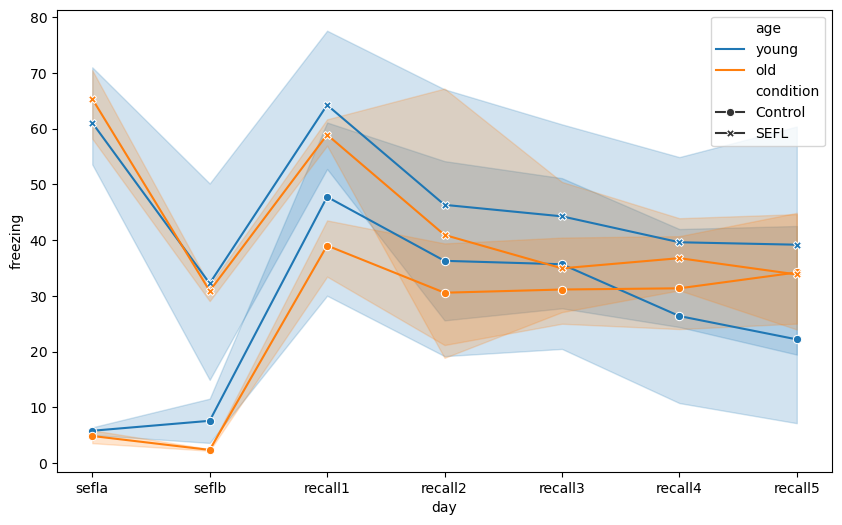

In [15]:
figure, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(
    data=freezing_aging,
    x="day",
    y="freezing",
    hue="age",
    ax=ax,
    style="condition",
    markers=True,
    dashes=False,
)

In [17]:
freezing_data.head()

,freezing,id,day,condition
1833,6.214833,94_1,sefla,Control
1834,4.664500,94_2,sefla,Control
1835,6.628833,94_3,sefla,Control
1836,5.732000,94_5,sefla,Control
1837,50.684167,95_1,sefla,SEFL


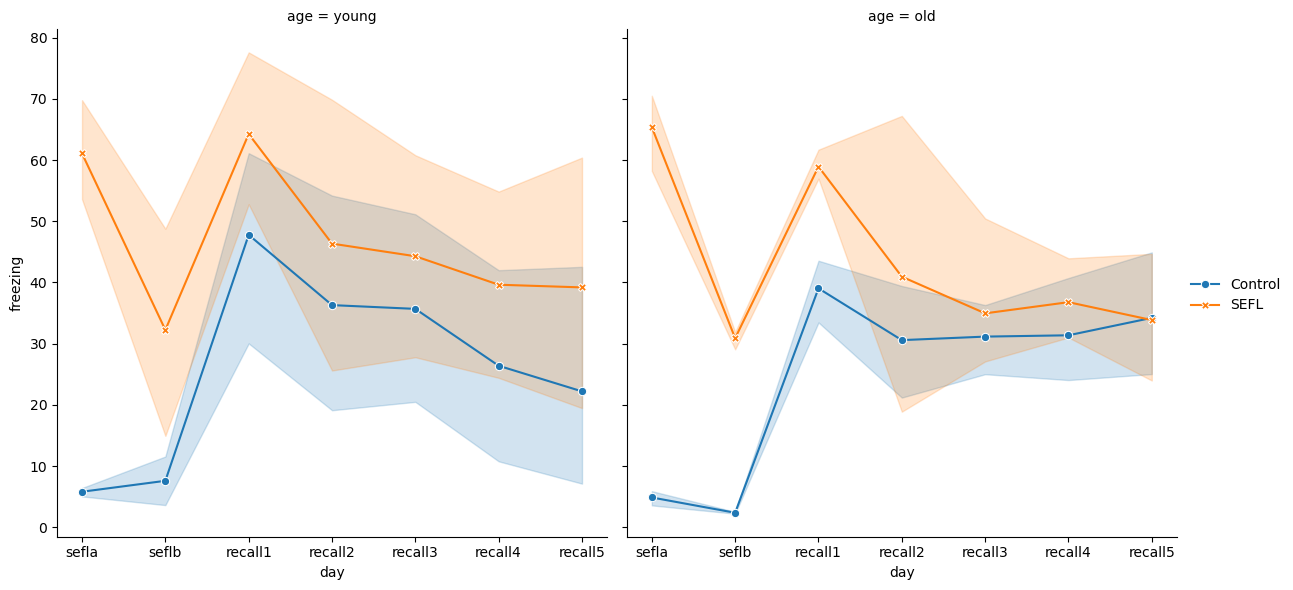

In [22]:
g = sns.FacetGrid(freezing_aging, col="age", height=6, aspect=1)
g.map_dataframe(
    sns.lineplot,
    x="day",
    y="freezing",
    hue="condition",
    style="condition",
    markers=True,
    dashes=False,
)

# g.map_dataframe(
#     sns.scatterplot, x="day", y="freezing", hue="condition", style="condition"
# )

g.add_legend()
plt.show()